# Plot Process multidimensional parameter study

Dakota has run a multi-dimensional parameter study on Process. 3 parameters (bt, te and rmajor) were varied, and the responses included the objective function (rmajor, which is uninteresting as it is a parameter too), the RMS violated constraints, and the individual violated constraint values. This is then plotted in a few different ways, to attempt to highlight what's interesting.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import h5py

In [52]:
hdf5_file = Path("responses.h5")

with h5py.File(hdf5_file, "r") as h5:
    results = h5["/methods/NO_METHOD_ID/results/execution:1/"]
    params = results["parameter_sets/continuous_variables"]
    # Access "column" headers
    # for i in params.dims[1][0]:
    #     print(i.decode())

    print(np.array(params.dims[1][0]))

[b'bt' b'te' b'rmajor']


## 2D contour plots

Plot how RMS violated constraints vary with 2 parameters. 

But how does this handle multiple values of `response_fn_2` for the same parameter values? Does it take the mean?

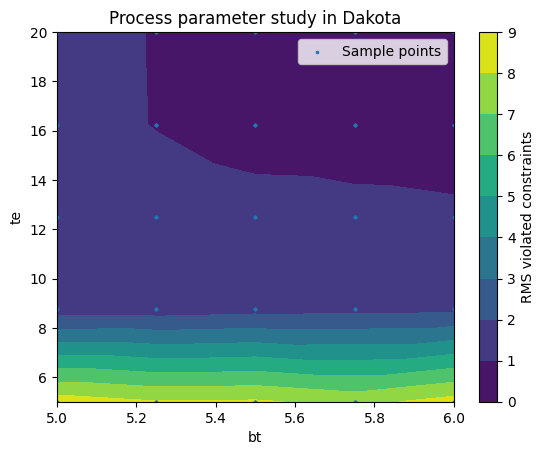

In [20]:
fig, ax = plt.subplots()
# tcf = ax.tricontourf(data["bt"], data["te"], data["response_fn_1"], norm="log", locator=matplotlib.ticker.LogLocator())
tcf = ax.tricontourf(data["bt"], data["te"], data["response_fn_2"])
fig.colorbar(tcf, label="RMS violated constraints")
ax.set_title("Process parameter study in Dakota")
ax.set_xlabel("bt")
ax.set_ylabel("te")

# Plot actual sample points
ax.scatter(data["bt"], data["te"], marker=".", label="Sample points", s=10)
ax.legend()

## 3D plots

A 3D plot might help visualise the path taken by the solver. Although this particular plot shows the same information as the 2D contour plot, it might be possible to separate the objective function (z axis) from the violated constraint values (surface colour). Plotting the actual value of the Lagrangian function (i.e. the solver's objective function) would be most interesting, but requires the evaluation of the Lagrange multipliers at each individual point, outside of the solver. This could be done in future.

Text(0.5, 0.5, 'te')

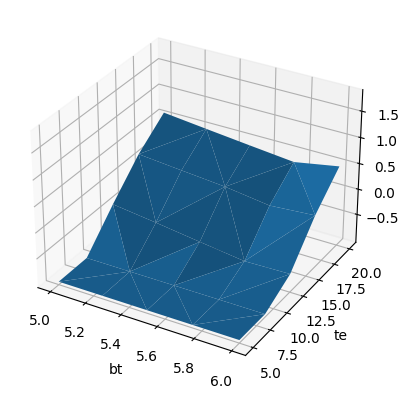

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_trisurf(data["bt"], data["te"], data["response_fn_2"])

surf = ax.plot_trisurf(data["bt"], data["te"], data["response_fn_12"])

# TODO Independent constraint surface colouring not yet working
# Try to set colour to constraint values
# norm = matplotlib.colors.Normalize()
# # norm = matplotlib.colors.LogNorm()
# norm_colour_data = norm(data["response_fn_12"].to_numpy())
# color_map = matplotlib.colormaps["viridis"]
# colors = color_map(norm_colour_data)
# surf.set_fc("red")
# surf.set_fc(colors)
ax.set_xlabel("bt")
ax.set_ylabel("te")

## Correlogram

Plots everything against everything. Some interesting plots, but a lot of uninteresting ones; parameters against parameters just shows the sampling strategy. Better to focus on interesting plots only.

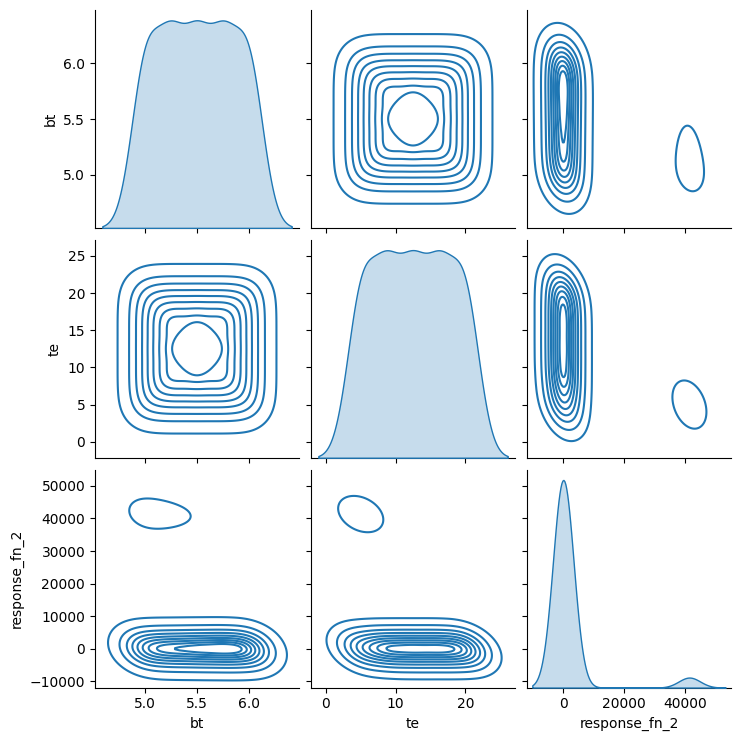

In [22]:
# Plot RMS violated constraints
# Gives scatters in non-diagonals
# sns.pairplot(data[["bt", "te", "response_fn_2"]], diag_kind="kde")
sns.pairplot(data[["bt", "te", "response_fn_2"]], kind="kde")

## Response distributions

More interesting.

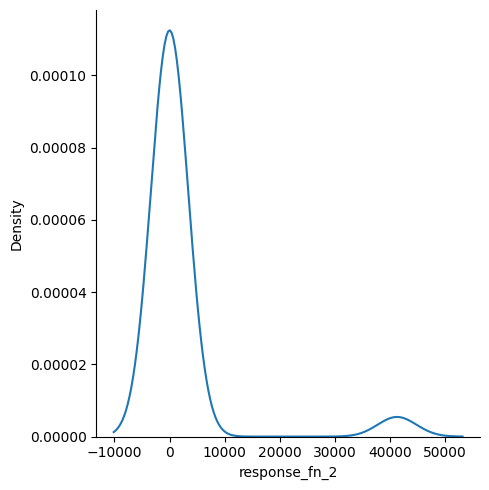

In [23]:
sns.displot(data, x="response_fn_2", kind="kde")

Interesting, shows distribution of constraints.

## Response against params

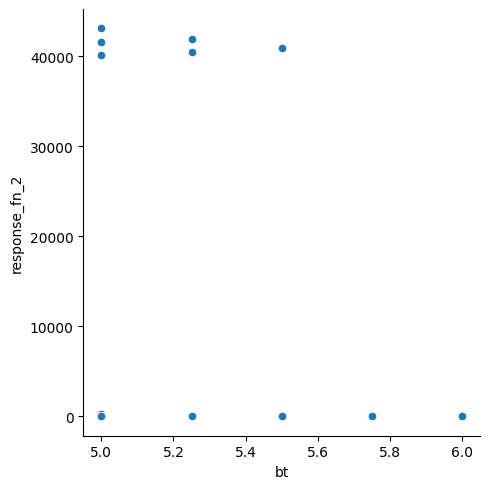

In [24]:
ax = sns.relplot(data=data, x="bt", y="response_fn_2")
# Zoomed-in to see dist around y=0
# ax.set(ylim=(-0.1, 30.0))

Shows how a response varies with a parameter, with all points plotted.


### Facets

Multiple plots can be produced to show different facets of the data.

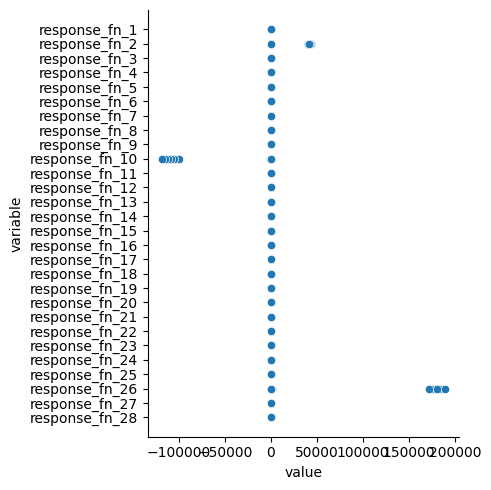

In [35]:
# Weird plot, but shows violated constraints
params = ["bt", "te", "rmajor"]
melted_data = data.melt(id_vars=params)
melted_data
sns.relplot(data=melted_data, x="value", y="variable")

Multiple parameter against response plots are more interesting.

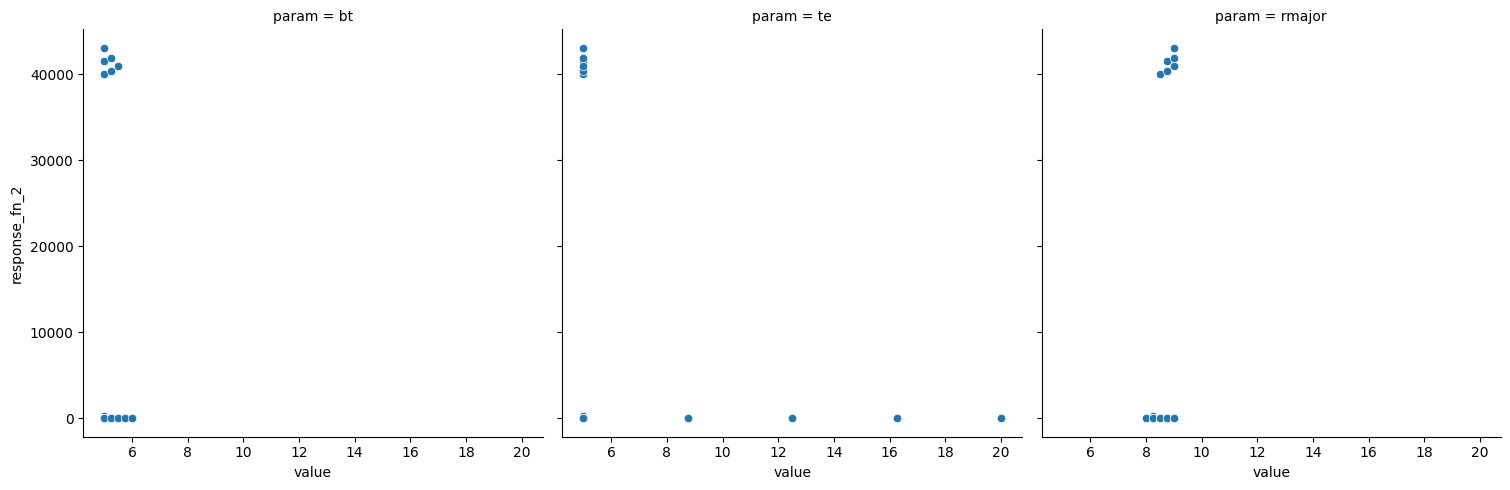

In [ ]:
responses = [col for col in data.columns if col not in params]
# id_vars are responses
melted_data = data.melt(id_vars=responses, var_name="param")
melted_data
# Use param name as categorical data for col
sns.relplot(data=melted_data, x="value", y="response_fn_2", col="param", col_wrap=4)


## Response against response

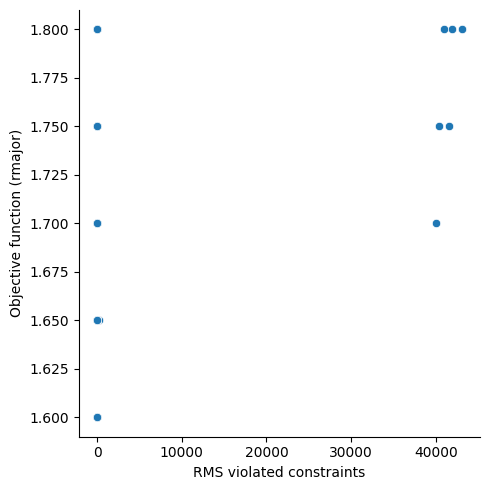

In [25]:
ax = sns.relplot(data=data, x="response_fn_2", y="response_fn_1")
ax.set(xlabel="RMS violated constraints", ylabel="Objective function (rmajor)")

For different objective function values, how violated the constraints were. Of interest.